In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
import time
import os

In [2]:
# Default settings
pd.options.display.max_columns = None
%matplotlib inline
sns.set(style="darkgrid")
random_seed = 42

In [26]:
df = pd.read_csv('data/output_objects_daily_combined.csv', index_col=0)
print(df.head())
df.shape

   POSTCODE OBJECT_TYPE_NAME Segment        DATE     AVG_DAY
0       0.0              GZB   Large  2009-12-22  171.916667
1       0.0              GZB   Large  2009-12-23  223.799020
2       0.0              GZB   Large  2009-12-24  223.799020
3       0.0              GZB   Large  2009-12-25  223.799020
4       0.0              GZB   Large  2009-12-26  223.799020


(2422640, 5)

In [27]:
# converting to datetime
df.DATE = df.DATE.apply(pd.to_datetime)
# filtering dates in scope
df = df.loc[df.DATE >= '2010']
# converting to ints
df.POSTCODE = df.POSTCODE.astype(int)
print(df.head())
df.shape

    POSTCODE OBJECT_TYPE_NAME Segment       DATE    AVG_DAY
10         0              GZB   Large 2010-01-01  223.79902
11         0              GZB   Large 2010-01-02  223.79902
12         0              GZB   Large 2010-01-03  223.79902
13         0              GZB   Large 2010-01-04  223.79902
14         0              GZB   Large 2010-01-05  223.79902


(2046976, 5)

In [28]:
postcodes = pd.read_csv('data/Postal_codes_object_data.csv', sep=';')
postcodes.head()

,POSTCODE,BOROUGH
0,0,Undefined
1,1011,Centrum
2,1012,Centrum
3,1013,West
4,1014,West


In [29]:
df = df.merge(postcodes, how='left', on='POSTCODE')
df.head()

,POSTCODE,OBJECT_TYPE_NAME,Segment,DATE,AVG_DAY,BOROUGH
0,0,GZB,Large,2010-01-01,223.79902,Undefined
1,0,GZB,Large,2010-01-02,223.79902,Undefined
2,0,GZB,Large,2010-01-03,223.79902,Undefined
3,0,GZB,Large,2010-01-04,223.79902,Undefined
4,0,GZB,Large,2010-01-05,223.79902,Undefined


In [32]:
df['YEAR'], df['MONTH'] = df.DATE.dt.year, df.DATE.dt.month
df.head()

,POSTCODE,OBJECT_TYPE_NAME,Segment,DATE,AVG_DAY,BOROUGH,YEAR,MONTH
0,0,GZB,Large,2010-01-01,223.79902,Undefined,2010,1
1,0,GZB,Large,2010-01-02,223.79902,Undefined,2010,1
2,0,GZB,Large,2010-01-03,223.79902,Undefined,2010,1
3,0,GZB,Large,2010-01-04,223.79902,Undefined,2010,1
4,0,GZB,Large,2010-01-05,223.79902,Undefined,2010,1


In [68]:
# fixing infinite and null values
df.AVG_DAY.replace([-np.inf, np.inf, np.nan], 0, inplace=True)
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046976 entries, 0 to 2046975
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   POSTCODE          2046976 non-null  int64         
 1   OBJECT_TYPE_NAME  2046976 non-null  object        
 2   Segment           2046976 non-null  object        
 3   DATE              2046976 non-null  datetime64[ns]
 4   AVG_DAY           2046976 non-null  float64       
 5   BOROUGH           2046976 non-null  object        
 6   YEAR              2046976 non-null  int64         
 7   MONTH             2046976 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 220.6+ MB


In [96]:
# extract new-style object cluster
df['OBJECT_CLUSTER'] = df.OBJECT_TYPE_NAME.str[-2:] + '_' + df.Segment
df.head()

,POSTCODE,OBJECT_TYPE_NAME,Segment,DATE,AVG_DAY,BOROUGH,YEAR,MONTH,OBJECT_CLUSTER
0,0,GZB,Large,2010-01-01,223.79902,Undefined,2010,1,ZB_Large
1,0,GZB,Large,2010-01-02,223.79902,Undefined,2010,1,ZB_Large
2,0,GZB,Large,2010-01-03,223.79902,Undefined,2010,1,ZB_Large
3,0,GZB,Large,2010-01-04,223.79902,Undefined,2010,1,ZB_Large
4,0,GZB,Large,2010-01-05,223.79902,Undefined,2010,1,ZB_Large


In [106]:
# saving data to csv
df.groupby(['BOROUGH', 'OBJECT_CLUSTER', 'YEAR'])['AVG_DAY'].sum().to_csv('data/output_objects_borough_cluster_year.csv')

In [97]:
df_yearly = df.groupby(['BOROUGH', 'OBJECT_CLUSTER', 'YEAR'])['AVG_DAY'].sum()
df_yearly

BOROUGH   OBJECT_CLUSTER  YEAR
Abcoude   HB_Large        2018       282.000000
          HB_Medium       2010       -12.277174
                          2011       296.258427
                          2012       740.646067
                          2013       -48.000000
                                      ...      
Zuidoost  ZB_Small        2015    144221.967718
                          2016    140669.680427
                          2017    143587.136503
                          2018    145962.870994
                          2019    101775.925574
Name: AVG_DAY, Length: 1100, dtype: float64

In [102]:
df.loc[df.OBJECT_CLUSTER == 'HB_Mega']

,POSTCODE,OBJECT_TYPE_NAME,Segment,DATE,AVG_DAY,BOROUGH,YEAR,MONTH,OBJECT_CLUSTER
11133,0,HHB,Mega,2011-03-24,342.0,Undefined,2011,3,HB_Mega
11134,0,HHB,Mega,2011-03-25,342.0,Undefined,2011,3,HB_Mega
11135,0,HHB,Mega,2011-04-30,-424.0,Undefined,2011,4,HB_Mega
11136,0,HHB,Mega,2011-05-01,-424.0,Undefined,2011,5,HB_Mega
11137,0,HHB,Mega,2011-11-02,-697.0,Undefined,2011,11,HB_Mega
...,...,...,...,...,...,...,...,...,...
2036003,2106,HHB,Mega,2014-12-01,6515.0,Heemstede,2014,12,HB_Mega
2036004,2106,HHB,Mega,2015-01-15,-996.0,Heemstede,2015,1,HB_Mega
2036005,2106,HHB,Mega,2015-01-16,-996.0,Heemstede,2015,1,HB_Mega
2036006,2106,HHB,Mega,2015-11-25,714.0,Heemstede,2015,11,HB_Mega


In [100]:
pd.pivot_table(df_yearly.reset_index(), index='YEAR', columns='OBJECT_CLUSTER', values='AVG_DAY', aggfunc=np.sum)

OBJECT_CLUSTER,HB_Large,HB_Medium,HB_Mega,HB_Small,ZB_Large,ZB_Medium,ZB_Mega,ZB_Small
YEAR,,,,,,,,
2010,2.232804e+06,5.347468e+06,80686.648205,2.119217e+07,6.272265e+06,6.100940e+06,4.072040e+06,2.262148e+06
2011,1.030570e+06,5.322282e+06,-151144.261854,2.341605e+07,6.151079e+06,6.311088e+06,4.739790e+06,2.371014e+06
2012,7.343235e+05,5.547616e+06,114333.279017,2.414313e+07,6.239452e+06,6.440133e+06,4.575707e+06,2.504759e+06
2013,1.548417e+06,5.984383e+06,-34490.514922,2.327162e+07,6.103105e+06,6.468723e+06,4.686956e+06,2.394846e+06
2014,1.412575e+06,5.487204e+06,27647.226190,2.424054e+07,6.211948e+06,6.489266e+06,5.132155e+06,2.508519e+06
2015,7.388486e+05,4.814224e+06,27425.819919,2.676245e+07,6.530190e+06,6.694787e+06,5.323961e+06,2.556971e+06
2016,3.298701e+05,4.638164e+06,-74554.490476,2.807043e+07,6.350697e+06,6.938137e+06,5.095822e+06,2.659456e+06
2017,4.953939e+05,4.779053e+06,17405.400480,2.802878e+07,7.176754e+06,7.002783e+06,4.777879e+06,2.630294e+06
2018,7.556874e+05,6.010889e+06,1051.423077,2.741430e+07,7.882888e+06,7.306068e+06,4.531039e+06,2.521596e+06


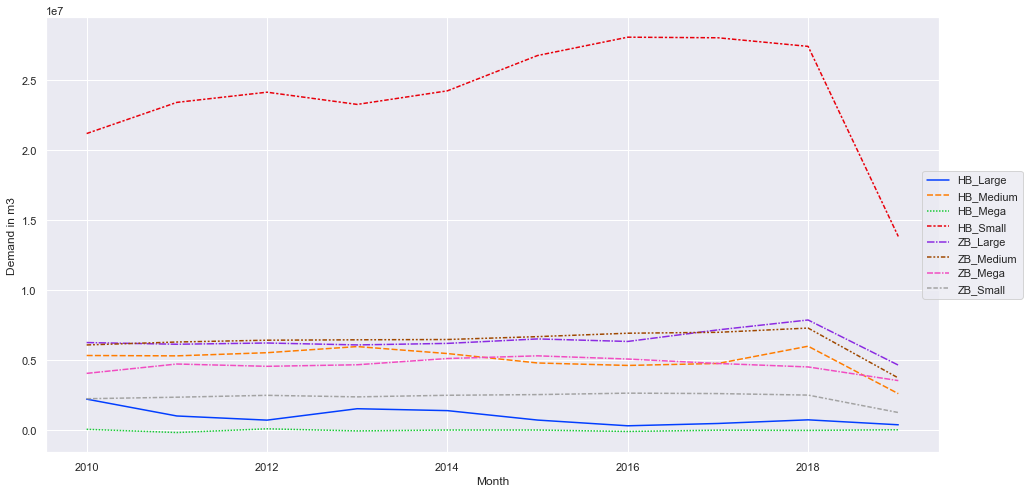

In [101]:
# Plot yearly seasonal trend
data = pd.pivot_table(df_yearly.reset_index(), index='YEAR', columns='OBJECT_CLUSTER', values='AVG_DAY', aggfunc=np.sum)
#df2['Mean'] = df2.mean(axis=1)

fig, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(data=data, ax=ax, palette='bright')
ax.set(xlabel='Month', ylabel='Demand in m3')

# Put a legend to the right side
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=1)

plt.show()